# Notebook 4: Data Analysis

### Importing necessary libraries:

In [1]:
import h5py
import pandas as pd
import csv
from scipy.io import wavfile
import numpy as np
import wave
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
import seaborn as sns

### Loading Metadata (CSV) File:

In [2]:
df = pd.read_csv('ESC50/Dataset/metadata.csv')
df.shape

(360, 8)

#### Getting 'filenames' and 'categories'

In [3]:
f_name = df.filename
labels = df.category

#### Loading E, f_tract, s_tract Data

In [4]:
E = list()
f_tract, s_tract = list(), list()
for name in f_name:
    try:
        name = name.split('.')[0]
        file = h5py.File('ESC50/Dataset/tracts/'+name+'.hdf5','r')
        e = np.array(file['E'])
        ftract = np.array(file['f_tract'])
        stract = np.array(file['s_tract'])
        E.append(e)
        f_tract.append(ftract)
        s_tract.append(stract)
    except:
        print(name)

#### Loading Arrays

In [5]:
pulse, tone, noise, energy = list(), list(), list(), list()

for name in f_name:
    name = name.split('.')[0]
    file = h5py.File('ESC50/Dataset/ptne/'+name+'.hdf5','r')
    p = np.array(file['pulse'])
    t = np.array(file['tone'])
    n = np.array(file['noise'])
    e = np.array(file['energy'])
    pulse.append(p)
    tone.append(t)
    noise.append(n)
    energy.append(e)

#### Transforming data into uniform arrays

In [6]:
ftract_data = np.zeros([360, 100, 8498])
for e, i in enumerate(f_tract):
    try:
        ftract_data[e] = i
    except:
#       print(e)
        diff = i.shape[1]
        i = np.append(i, np.zeros([100, 8498-diff]), axis = 1)
        ftract_data[e] = i
        
stract_data = np.zeros([360, 100, 8498])
for e, i in enumerate(s_tract):
    try:
        stract_data[e] = i
    except:
#       print(e)
        diff = i.shape[1]
        i = np.append(i, np.zeros([100, 8498-diff]), axis = 1)
        stract_data[e] = i

E_data = np.zeros([360, 100, 8498])
for e,i in enumerate(E):
    try:
        E_data[e] = i
    except:
#       print(e)
        diff = i.shape[1]
        i = np.append(i, np.zeros([100, 8498-diff]), axis = 1)
        E_data[e] = i
        
pulse_data = np.zeros([360, 6, 48])
for e,i in enumerate(pulse):
    try:
        pulse_data[e] = i
    except:
#       print(e)
        i = np.append(i, np.zeros([6, 4]), axis = 1)
        pulse_data[e] = i
        
tone_data = np.zeros([360, 6, 48])
for e,i in enumerate(tone):
    try:
        tone_data[e] = i
    except:
#       print(e)
        i = np.append(i, np.zeros([6, 4]), axis = 1)
        tone_data[e] = i

energy_data = np.zeros([360, 6, 48])
for e,i in enumerate(energy):
    try:
        energy_data[e] = i
    except:
#       print(e)
        i = np.append(i, np.zeros([6, 4]), axis = 1)
        energy_data[e] = i
        
noise_data = np.zeros([360, 6, 48])
for e,i in enumerate(noise):
    try:
        noise_data[e] = i
    except:
#       print(e)
        i = np.append(i, np.zeros([6, 4]), axis = 1)
        noise_data[e] = i

### Data Analysis

#### Utilizing filenames and categories from metadata and checking number of datapoints for each category:

In [7]:
output = df['category'].values
label = set(output)
print('Total categories are:', len(label))
print('-'*100)
print('Audio categories are:', label)

Total categories are: 9
----------------------------------------------------------------------------------------------------
Audio categories are: {'vacuum_cleaner', 'footsteps', 'coughing', 'washing_machine', 'sneezing', 'snoring', 'toilet_flush', 'laughing', 'breathing'}


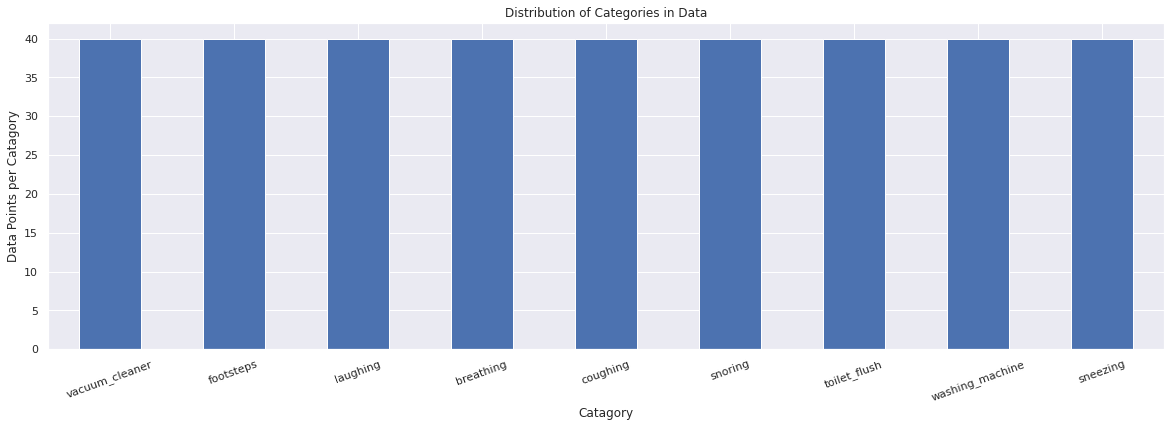

In [8]:
sns.set(rc = {'figure.figsize':(20, 6)})
class_distribution = df['category'].value_counts()
class_distribution.plot(kind = 'bar', rot = 20)
plt.xlabel('Catagory')
plt.ylabel('Data Points per Catagory')
plt.title('Distribution of Categories in Data')
plt.show()

#### Plotting Waveshapes and Spectrogram for E, f_tract, s_tract and PTNE

In [9]:
category, category_index = np.unique(labels, return_index = True)

In [10]:
def spectrogram_wave(data, category, category_index, data_name):
    plt.figure(figsize=(12, 15))
    print("Spectogram of %s"%data_name)
    for e, categ in enumerate(category_index):
        plt.subplot(3, 3, e+1)
        plt.imshow(data[categ], aspect = 'auto')   
        plt.xlabel(category[e])
    plt.show()
    
    print("Wave plots of %s"%data_name)
    plt.figure(figsize=(12, 15))
    for e, categ in enumerate(category_index):
        plt.subplot(3, 3, e+1)
        plt.plot(data[categ][10])   
        plt.xlabel(category[e])
    plt.show()

#### E Waves and Spectograms

Spectogram of E(dB) Data


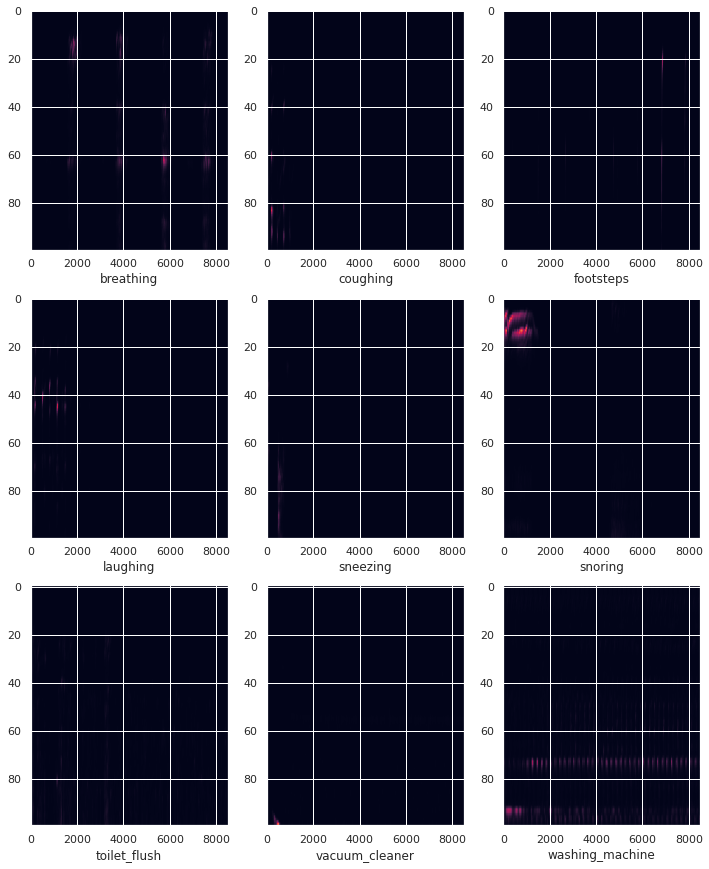

Wave plots of E(dB) Data


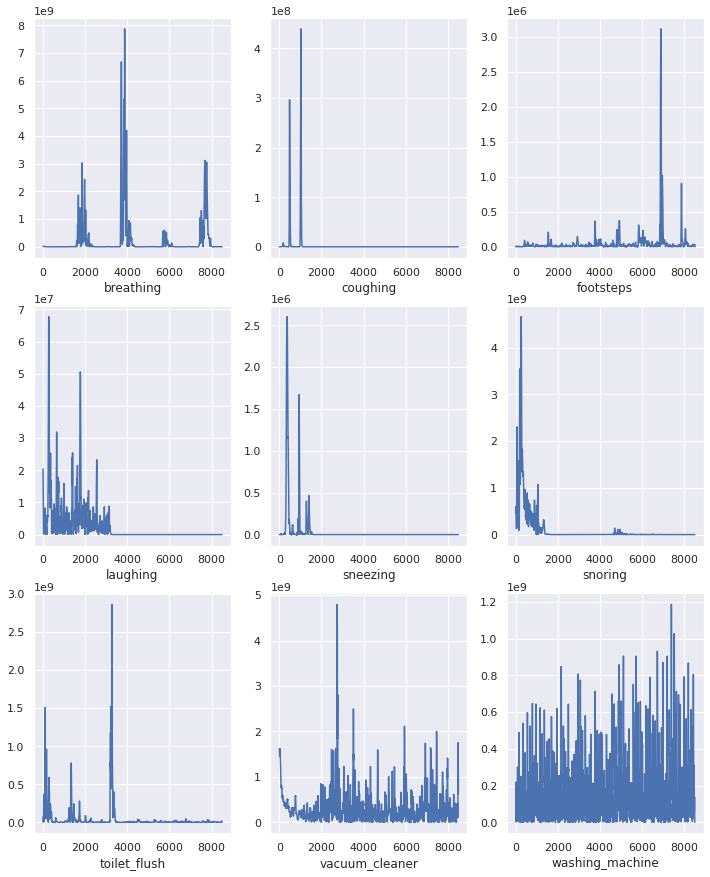

In [11]:
spectrogram_wave(E_data, category, category_index, "E(dB) Data")

#### f_tract Waves and Spectograms

Spectogram of f_tract Data


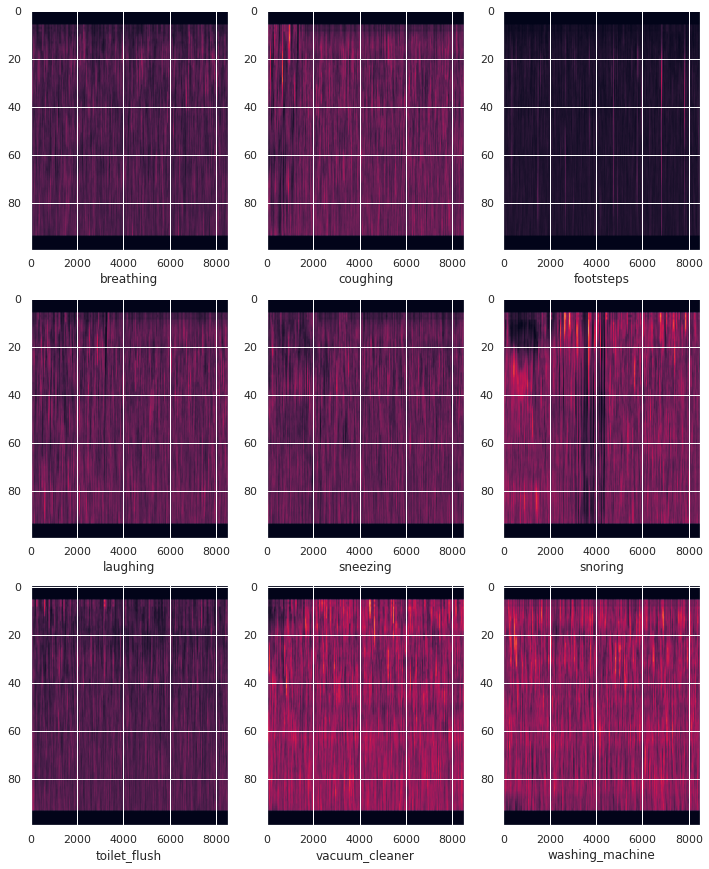

Wave plots of f_tract Data


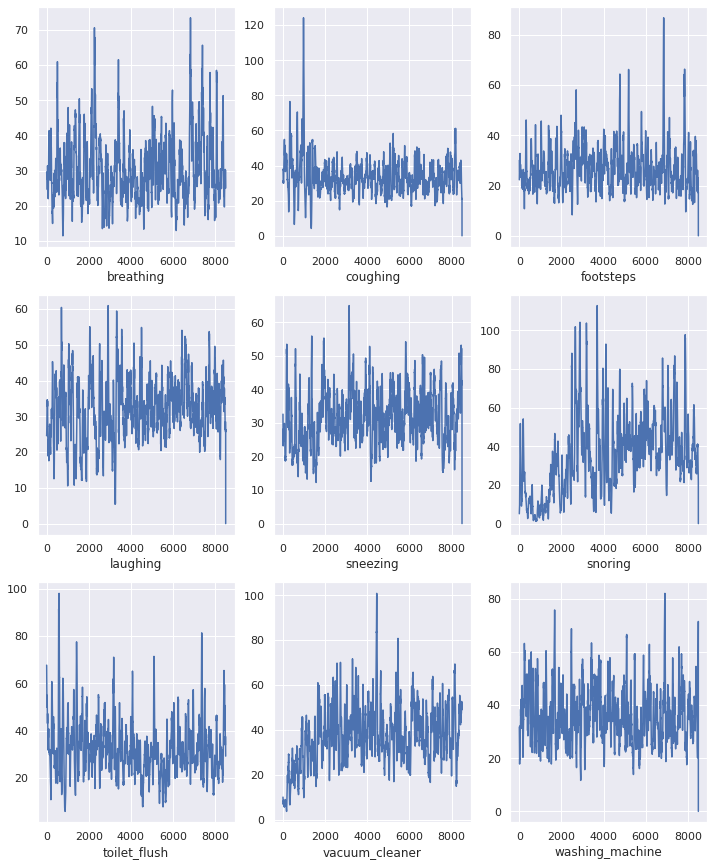

In [12]:
spectrogram_wave(ftract_data, category, category_index, "f_tract Data")

#### s_tract Waves and Spectograms

Spectogram of sTract_data


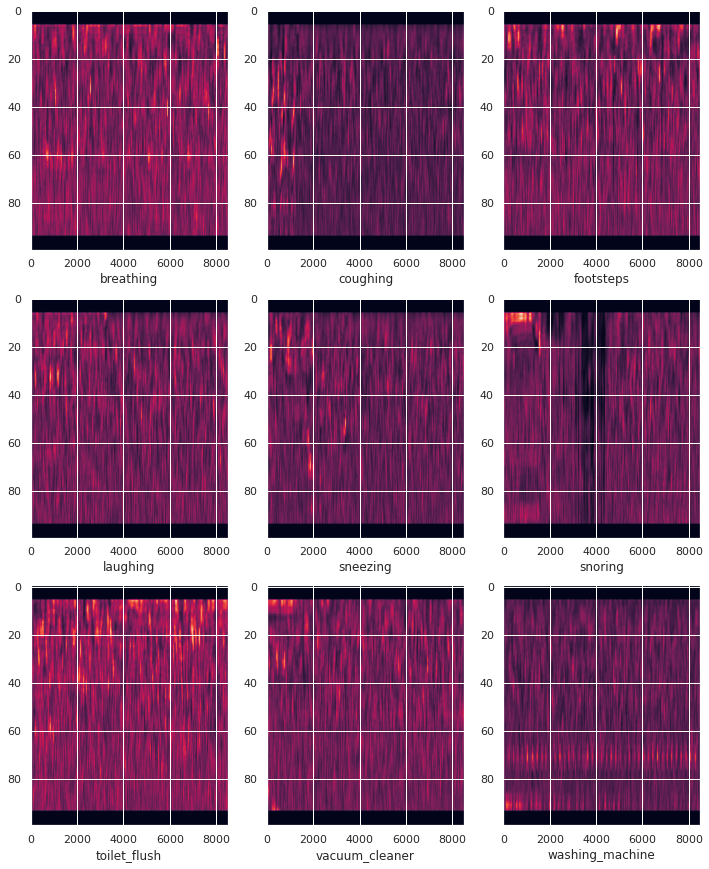

Wave plots of sTract_data


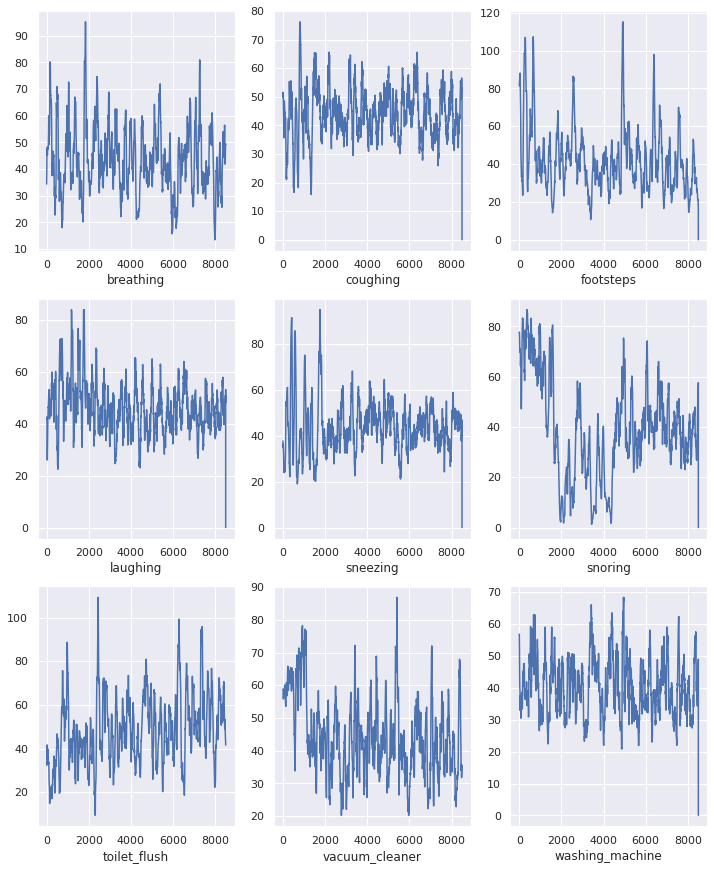

In [13]:
spectrogram_wave(stract_data, category, category_index, "sTract_data")

#### Pulse Waves and Spectograms

In [14]:
def spectrogram_wave(data, category, category_index, data_name):
    plt.figure(figsize=(12, 15))
    print("-----------------Spectogram of %s---------------"%data_name)
    for e, categ in enumerate(category_index):
        plt.subplot(3, 3, e+1)
        plt.imshow(data[categ],aspect='auto')   
        plt.xlabel(category[e])
    plt.show()
    
    print("-----------------1st wave plots of %s---------------"%data_name)
    plt.figure(figsize=(12, 15))
    for e, categ in enumerate(category_index):
        plt.subplot(3, 3, e+1)
        plt.plot(data[categ][4])   
        plt.xlabel(category[e])
    plt.show()

-----------------Spectogram of Pulse_data---------------


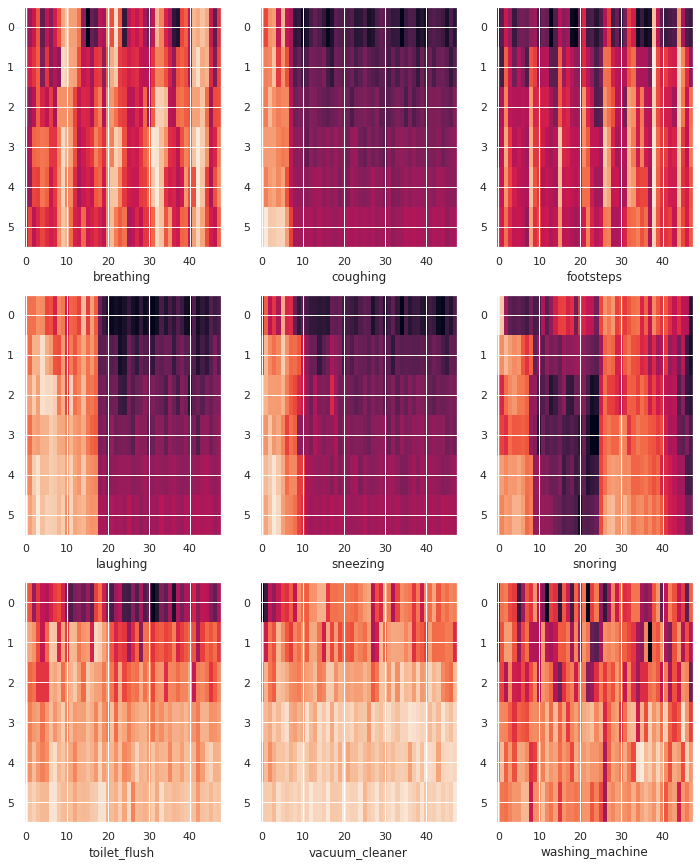

-----------------1st wave plots of Pulse_data---------------


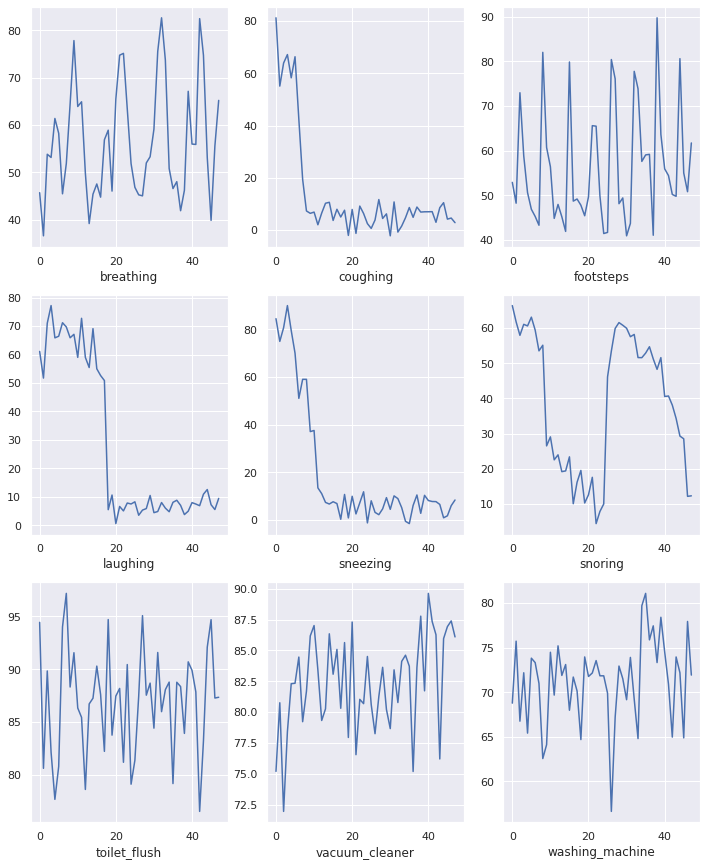

In [15]:
spectrogram_wave(pulse_data, category, category_index, "Pulse_data")

#### Tone Waves and Spectograms

-----------------Spectogram of Tone_data---------------


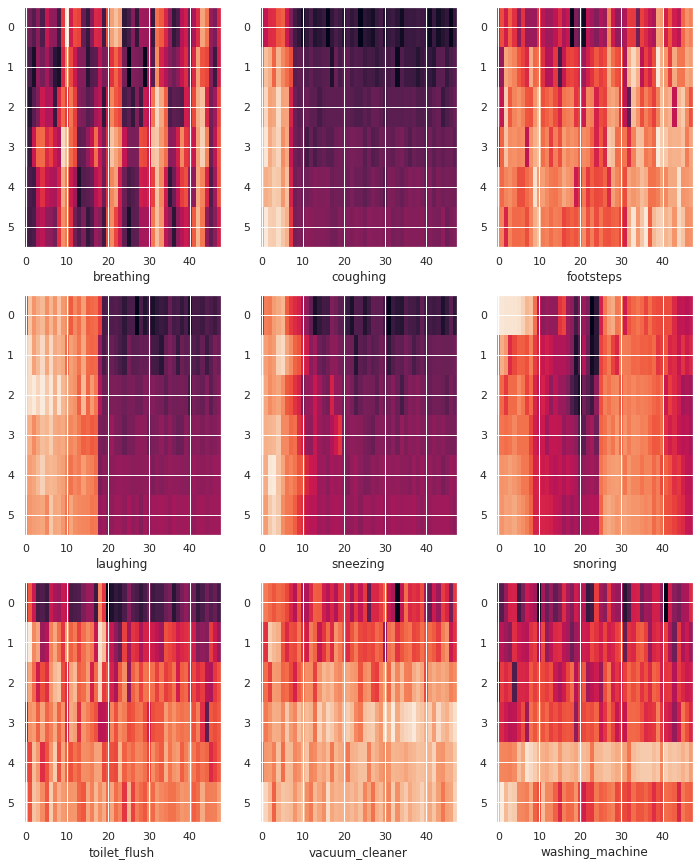

-----------------1st wave plots of Tone_data---------------


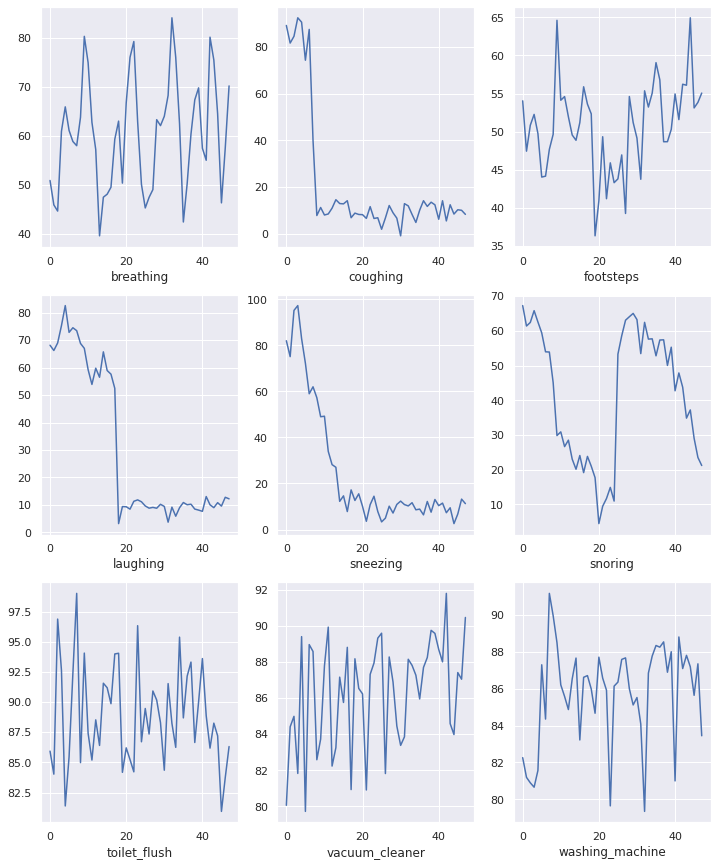

In [16]:
spectrogram_wave(tone_data, category, category_index, "Tone_data")

#### Noise Waves and Spectograms

-----------------Spectogram of Noise_data---------------


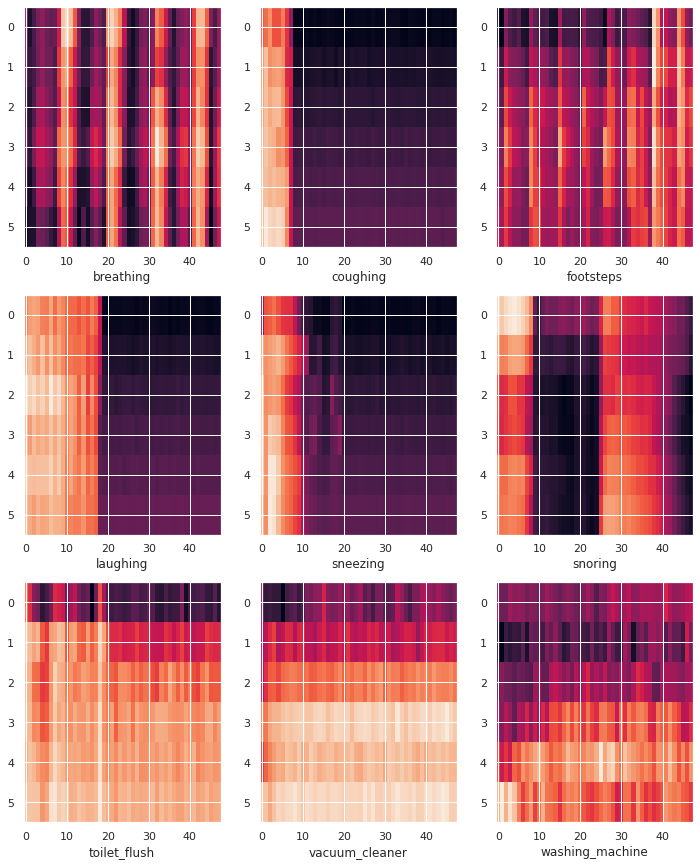

-----------------1st wave plots of Noise_data---------------


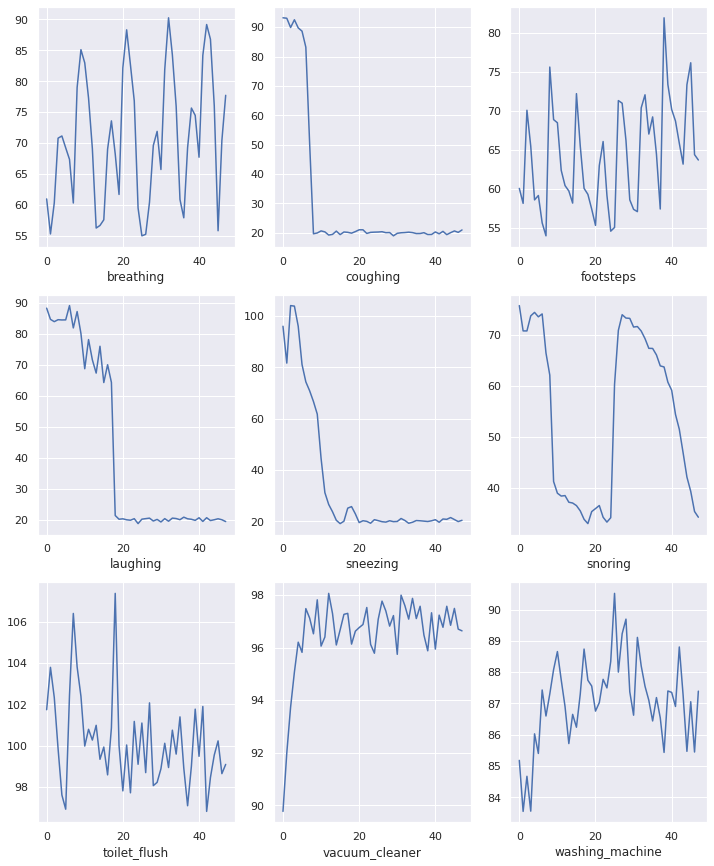

In [17]:
spectrogram_wave(noise_data, category, category_index, "Noise_data")

#### Energy Waves and Spectograms

-----------------Spectogram of Energy_data---------------


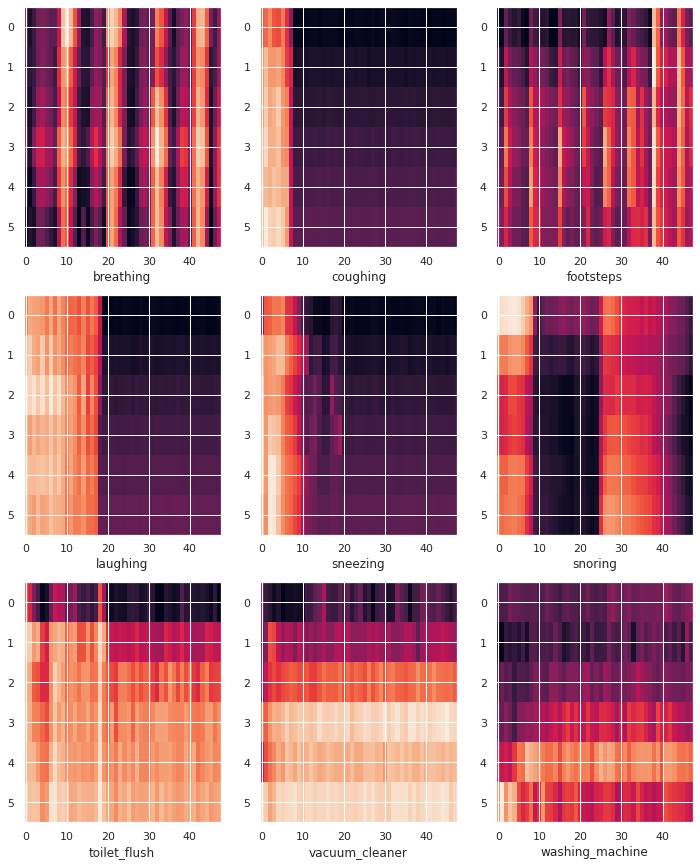

-----------------1st wave plots of Energy_data---------------


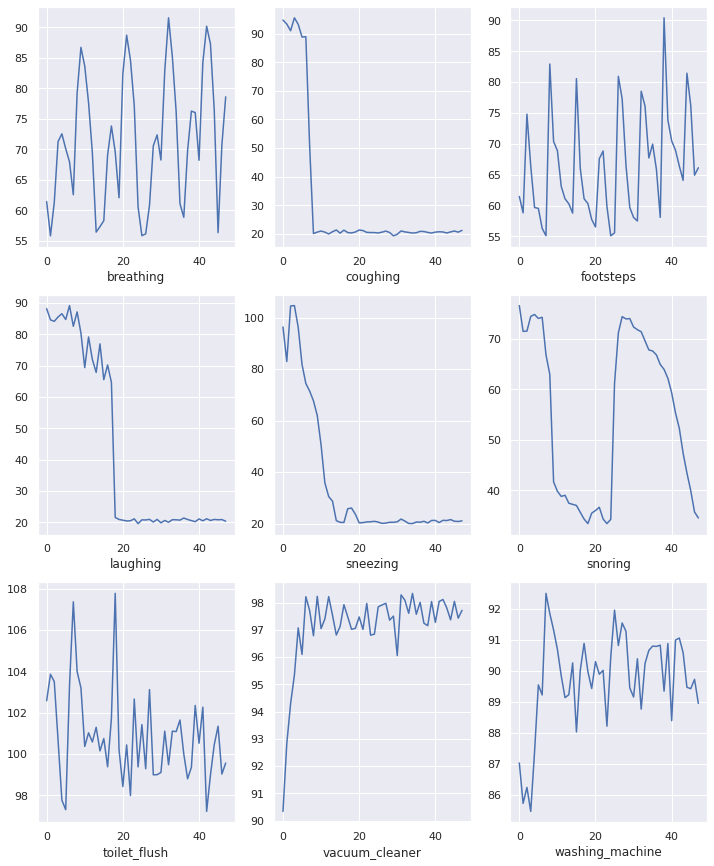

In [18]:
spectrogram_wave(energy_data, category, category_index, "Energy_data")

#### Main Research Question:

* Can we infer the source of a sound recording from the tract and E (dB) data?

#### Subquestions:
* How can we, based on the tract and E data, define a suitable set of features?
* Which algorithms can be used to solve this task?
* How does performance of the classifiers built depend on the machine learning algorithm and their parameters?
* How does performance of the classifiers built depend on feature extraction parameters?

#### Answers:

Once the data labels are known (categories like sneezing or footsteps), the source of the sounds can be infered and the data patterns are quite visible for different categories.<br>
Based on the given data, suitable features could be "Spectral Centroids" of E dB, f_tract and s_tract.<br><br>
Spectral Centroid - The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:
![Alt text](SC_eq.png?raw=true "Spectral Centroid Equation")
where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.<br>
Reference: https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html<br><br>
Another set of features can be the Mean (Average), Min and Max of the PTNE Data of each HDF5 file.<br>
Together with three Spectral Centroids and the Mean, Min and Max of PTNE datapoints for each HDF5 file, a total of fifteen features (since 3 features were selected for P, T, N and E separately) were selected and the Machine Learning Algorithms will be trained using these data points.<br><br>
The performance of the Machine Learning Algorithms will be explained in the Modeling & Classification (AED_C_clasification_modeling_SC_v1.ipynb & AED_C_clasification_modeling_opencv_v1.ipynb) files.